## **Festival_Sales_Analysis**

In [3]:
# importing python libraries for eda
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline


In [7]:
# import csv file
df = pd.read_csv('/content/Festival_sales_analysis.csv', encoding= 'unicode_escape')

In [8]:
df.shape

(11251, 15)

Seeing first 5 rows for clear picture of data

In [63]:
df.head(5)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
#Dropping black coloumns--data cleaning
df.drop(['Status','unnamed1'], axis=1 ,inplace=True)

In [14]:
#Checking null values columns now
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
#Dropping null values from Amount Column
df.dropna(inplace=True)

In [16]:
#Checking null values columns now
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [17]:
#Changing the data type from float to int for amount column
df['Amount'] = df['Amount'].astype('int')

In [18]:
df['Amount'].dtypes

dtype('int64')

In [19]:
#Seeing all columns present
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std,min ,max etc)

In [21]:
df.describe()


,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [22]:
# used describe() function for specific columns analysis
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

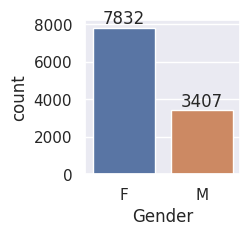

In [52]:
#Plotting Barchart for Gender vs Count
xx=sns.countplot(x='Gender',data =df)
sns.set(rc={'figure.figsize':(4,2)})
for bars in xx.containers:
    xx.bar_label(bars)


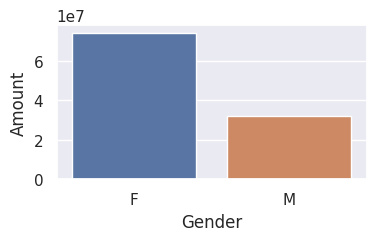

In [53]:
# Plotting Barchart for Gender vs total amount spent
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gender)
sns.set(rc={'figure.figsize':(4,2)})

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

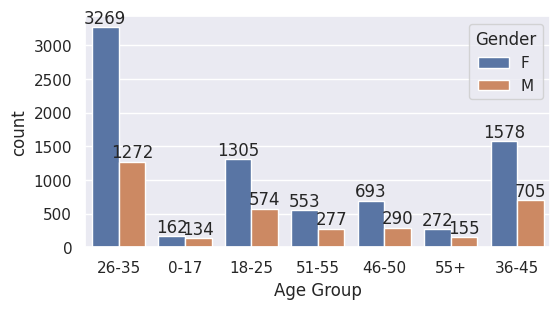

In [39]:
# Plotting Barchart for Age Group vs Count
xx = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
sns.set(rc={'figure.figsize':(1,2)})
for bars in xx.containers:
    xx.bar_label(bars)


<Axes: xlabel='Age Group', ylabel='Amount'>

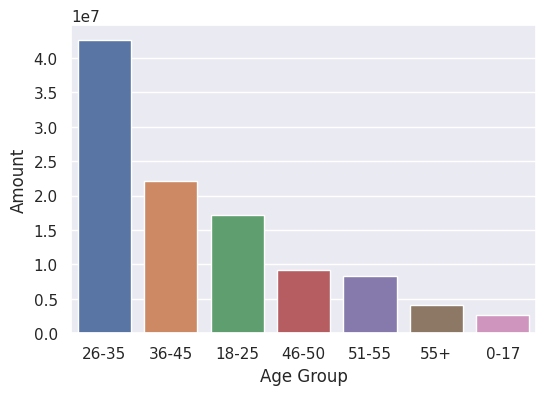

In [43]:
# Plotting Barchart for Total Amount Spent vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group  26-35 yrs and they are female*

<Axes: xlabel='State', ylabel='Orders'>

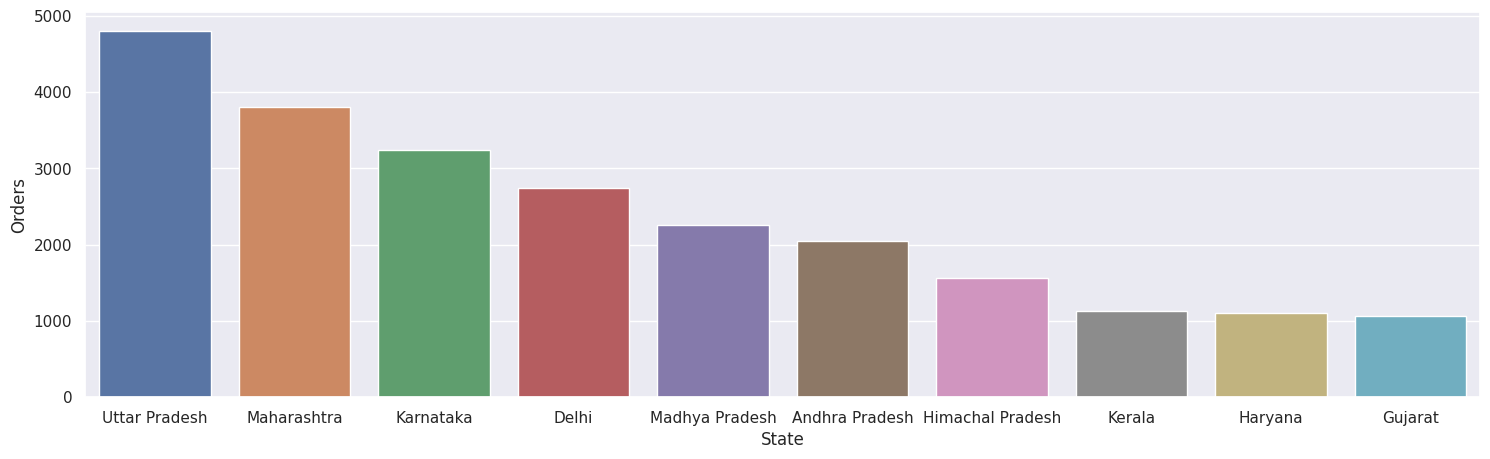

In [45]:
# Plotting BarChart for Top Ten States vs Orders
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

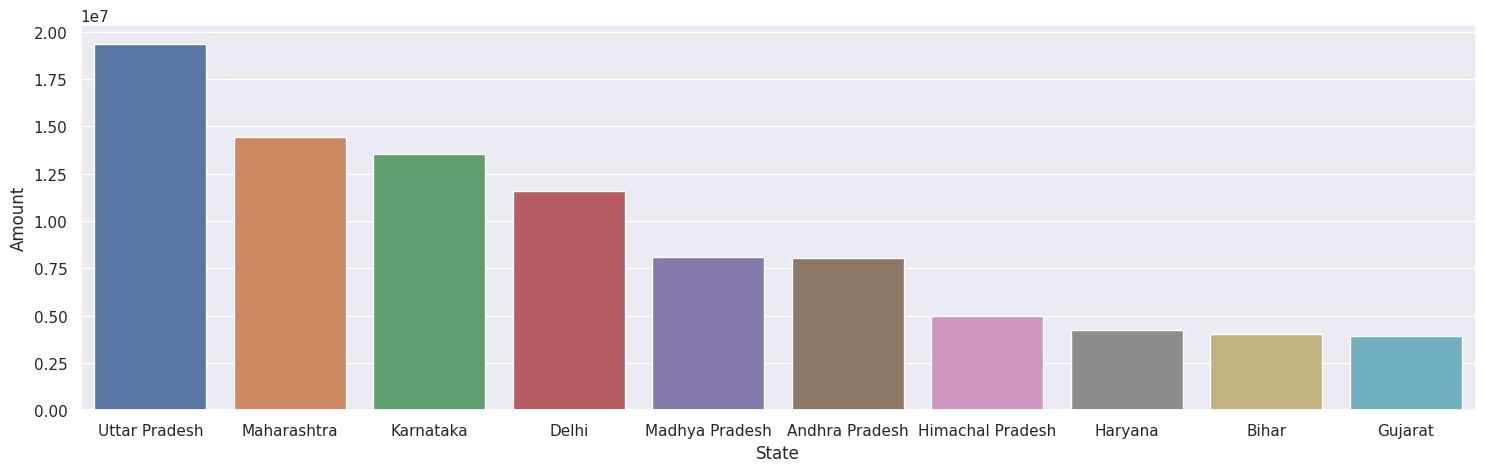

In [46]:
# Plotting Bar Chart for total amount/sales vs States for top ten states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh followed by  Maharashtra and Karnataka respectively*


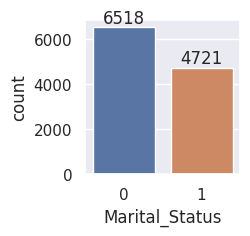

In [50]:
#Plotting Barchart for Orders Vs Marital Status 
xx = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc={'figure.figsize':(1,1)})
for bars in xx.containers:
    xx.bar_label(bars)   # to label count on graph

<Axes: xlabel='Marital_Status', ylabel='Amount'>

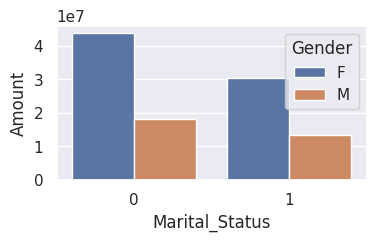

In [57]:
# Plotting Barchart for Amount Spent vs Marital Status
#0- Unmarried ,1- Married
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(4,2)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')


*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

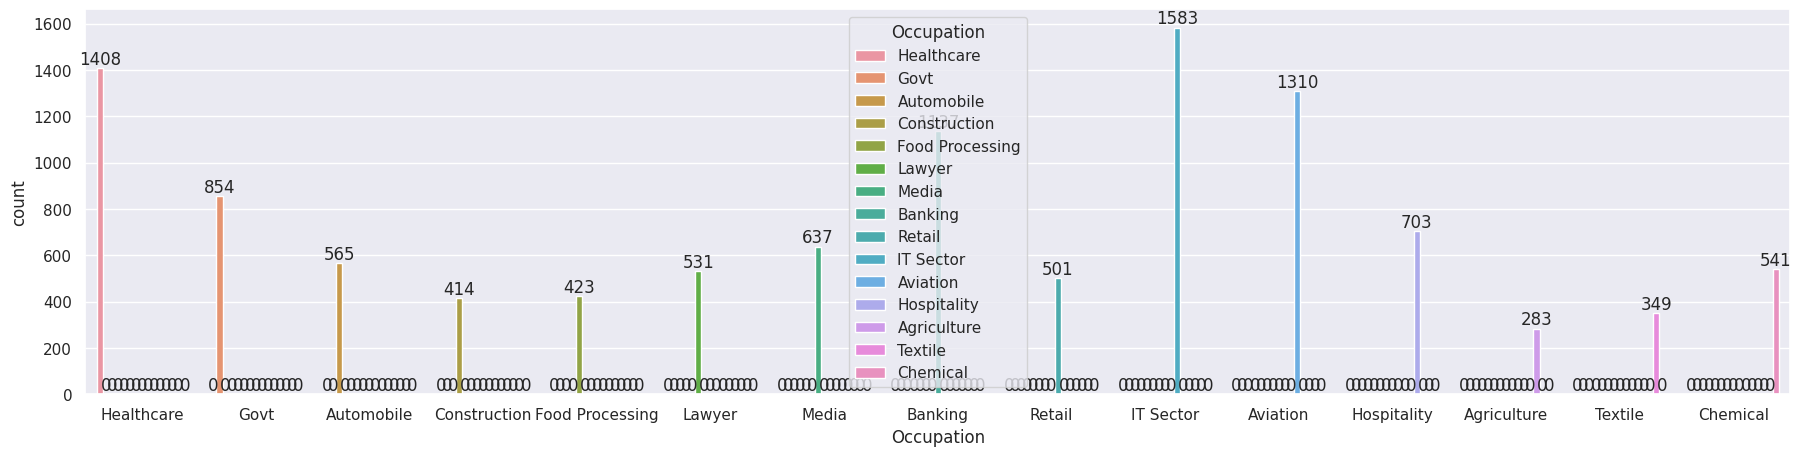

In [73]:
sns.set(rc={'figure.figsize':(22,5)})
xx = sns.countplot(data = df, x = 'Occupation',hue='Occupation')
for bars in xx.containers:
    xx.bar_label(bars)

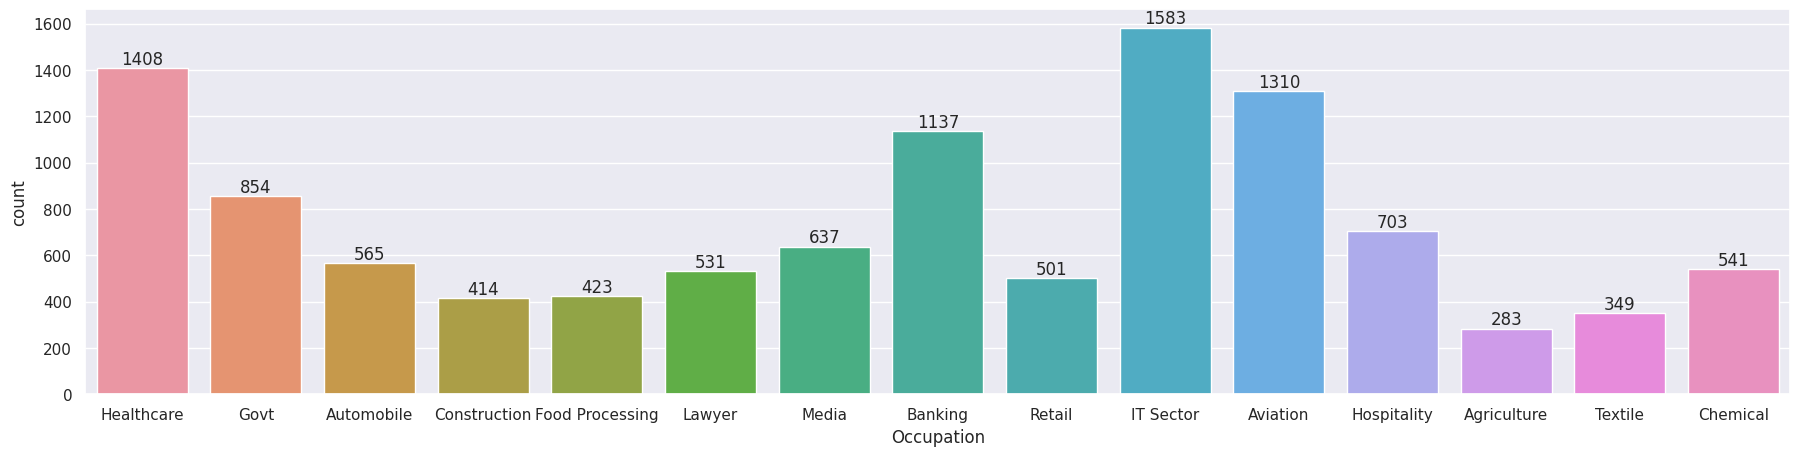

In [75]:
#Plotting BarChart for Occupation vs Count of Orders
sns.set(rc={'figure.figsize':(22,5)})
xx = sns.countplot(data = df, x = 'Occupation')
for bars in xx.containers:
    xx.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

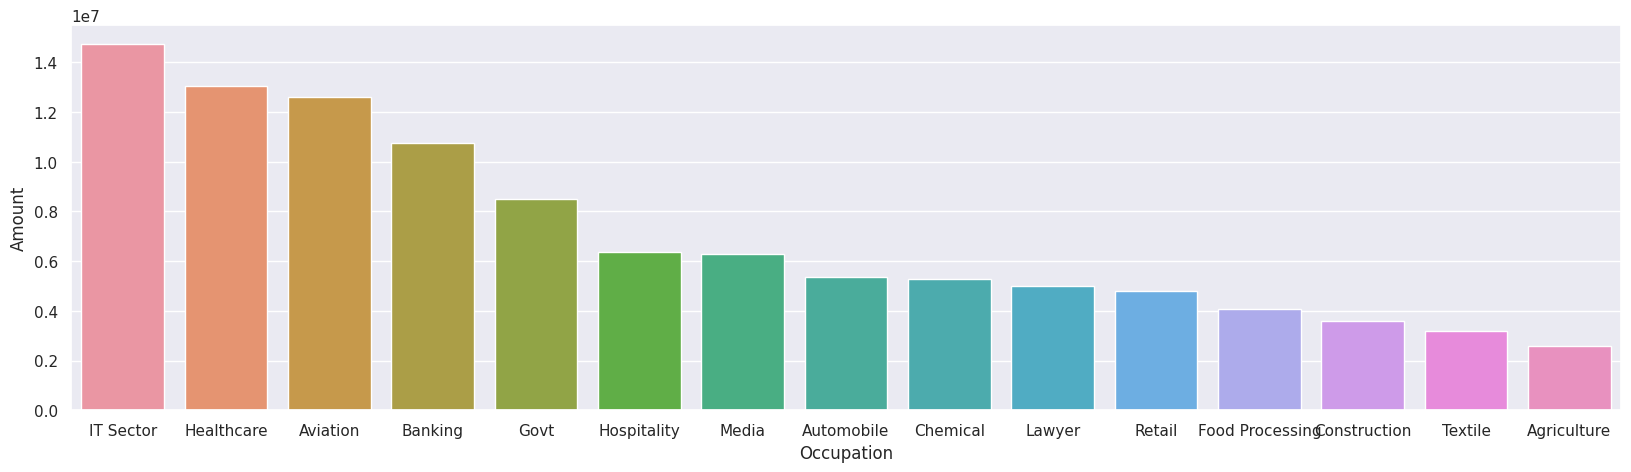

In [76]:
#Plotting BarChart for Occupation vs Total Amount of sale
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT followed by Healthcare and Aviation sector*

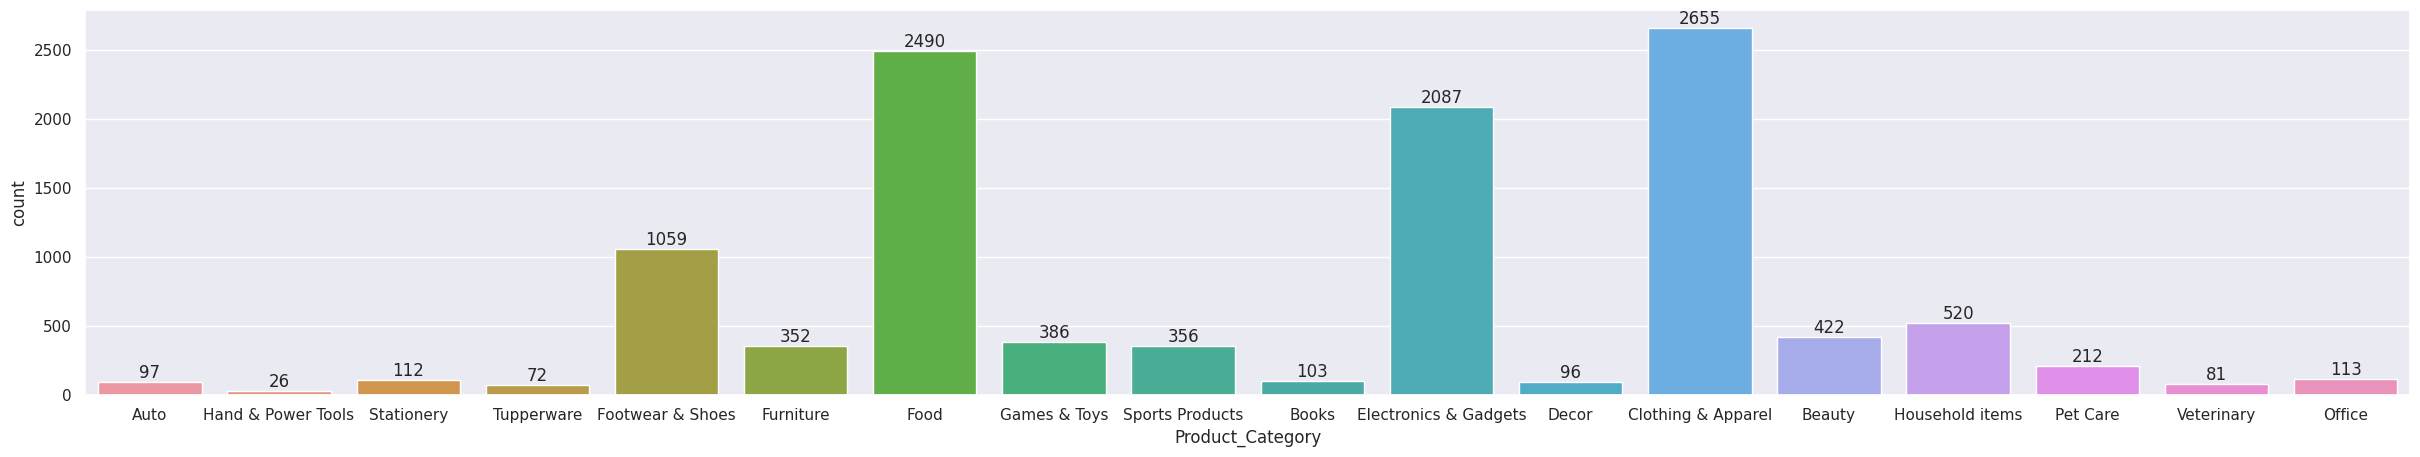

In [93]:
#Plotting Barchart for Product Category vs Count
sns.set(rc={'figure.figsize':(30,5)})
xx = sns.countplot(data = df , x='Product_Category')

for bars in xx.containers:
    xx.bar_label(bars)


<Axes: xlabel='Product_Category', ylabel='Amount'>

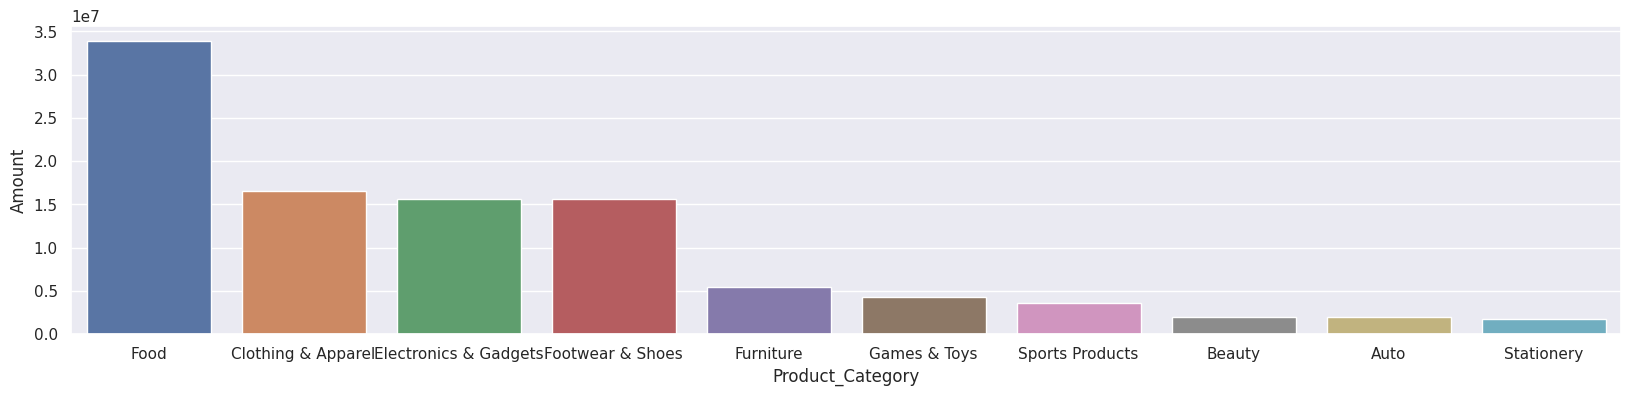

In [97]:
#Plotting Barchart for Product Category vs Total Sales
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food followed by Clothing and Electronics category*


<Axes: xlabel='Product_ID', ylabel='Orders'>

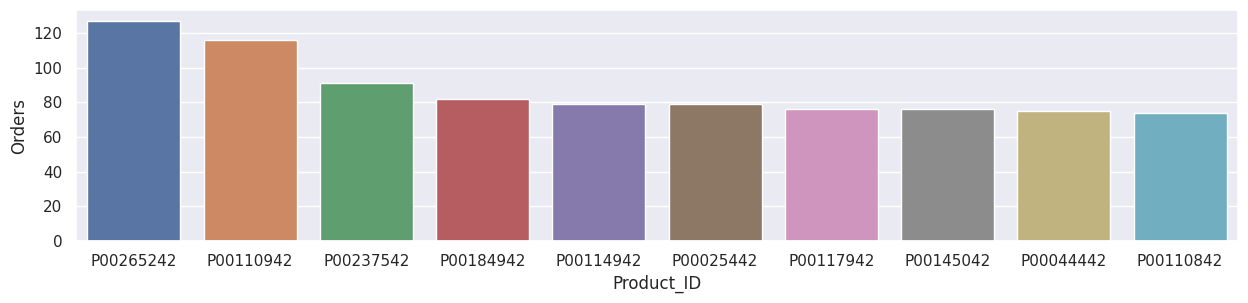

In [100]:
#Plotting Barchart for Top ten  Product ID vs Total Sales
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,3)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

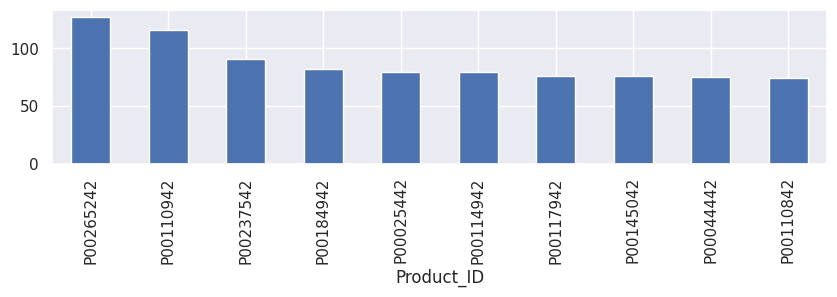

In [103]:
# top 10 most sold products id (same thing as above)

ax = plt.subplots(figsize=(10,2))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

**Conclusion** --*Married women in age group 26-35 yrs from UP, Maharastra and Karnataka who is  working in IT, Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics category*
